In [2]:
import os
import pandas as pd
import numpy as np
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore

In [22]:
# Update the data loading function to use ffill() instead of fillna(method='ffill')
def load_and_preprocess_data(file_path, rename_columns, fill_na=True):
    """
    Load a CSV file, rename columns, and handle missing values.
    
    :param file_path: Path to the CSV file
    :param rename_columns: Dictionary mapping old column names to new column names
    :param fill_na: If True, fill missing values with forward fill
    :return: Preprocessed DataFrame
    """
    try:
        # Load the dataset
        df = pd.read_csv(file_path)
        # Rename columns for consistency
        df = df.rename(columns=rename_columns)
        # Handle missing values (if any)
        if fill_na:
            df = df.ffill()  # Use ffill() to forward fill missing values
        return df
    except Exception as e:
        print(Fore.RED + f"Error loading or processing {file_path}: {e}" + Fore.RESET)
        return None

In [23]:
# Column renaming dictionary to standardize the columns across all datasets
rename_columns = {
    'Date': 'date',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Adj Close': 'adj_close',
    'Volume': 'volume'
}

In [24]:
# Define file paths
file_paths = {
    'bitcoin': R'Cryptocurrency Predictor\all-cryptocurrencies-price-20152021\Bitcoin\BTC-USD.csv',
    'dogecoin': R'Cryptocurrency Predictor/all-cryptocurrencies-price-20152021/Dogecoin/DOGE-USD.csv',
    'ethereum': R'Cryptocurrency Predictor/all-cryptocurrencies-price-20152021/Ethereum/ETH-USD.csv',
    'cardano': R'Cryptocurrency Predictor/all-cryptocurrencies-price-20152021/Cardano/ADA-USD.csv'
}


In [25]:
# Load and preprocess data for each cryptocurrency
bitcoindf = load_and_preprocess_data(file_paths['bitcoin'], rename_columns)
dogecoindf = load_and_preprocess_data(file_paths['dogecoin'], rename_columns)
ethereumdf = load_and_preprocess_data(file_paths['ethereum'], rename_columns)
cardanodf = load_and_preprocess_data(file_paths['cardano'], rename_columns)

In [26]:
# Display the first few rows of the Bitcoin dataset to confirm
if bitcoindf is not None:
    print(bitcoindf.head())

         date        open        high         low       close   adj_close  \
0  2015-09-13  235.242004  235.934998  229.332001  230.511993  230.511993   
1  2015-09-14  230.608994  232.440002  227.960999  230.643997  230.643997   
2  2015-09-15  230.492004  259.182007  229.822006  230.304001  230.304001   
3  2015-09-16  230.250000  231.214996  227.401993  229.091003  229.091003   
4  2015-09-17  229.076004  230.285004  228.925995  229.809998  229.809998   

       volume  
0  18478800.0  
1  20997800.0  
2  19177800.0  
3  20144200.0  
4  18935400.0  


In [27]:
# Optional: Explore and visualize the data to check trends or anomalies
def plot_data(df, title='Cryptocurrency Data', column='close'):
    """
    Plot the closing price of a cryptocurrency.
    
    :param df: DataFrame containing the cryptocurrency data
    :param title: Title for the plot
    :param column: Column to plot (default is 'close')
    """
    if df is not None:
        df['date'] = pd.to_datetime(df['date'])
        plt.figure(figsize=(12, 6))
        plt.plot(df['date'], df[column], label=title, color='blue')
        plt.title(f'{title} Price Trend')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.show()

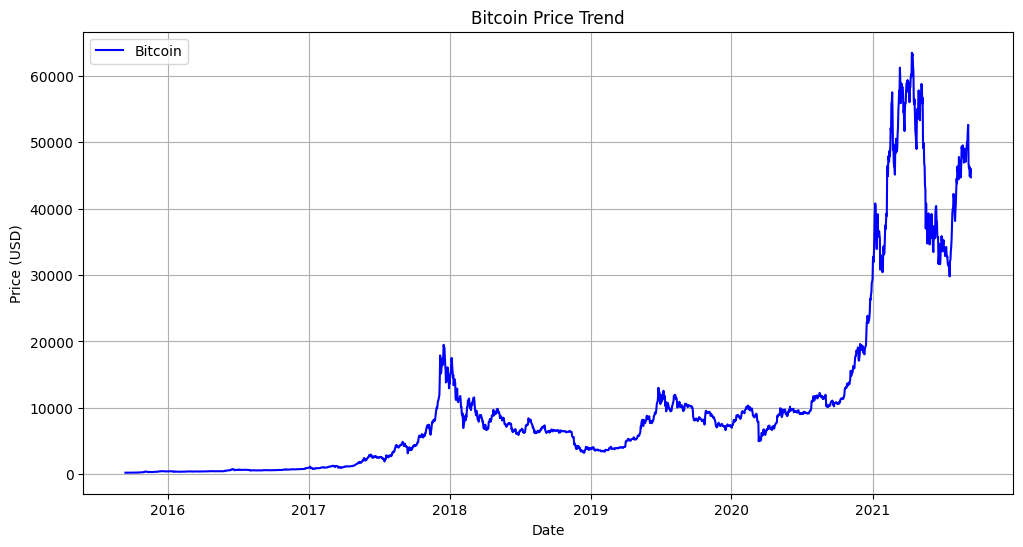

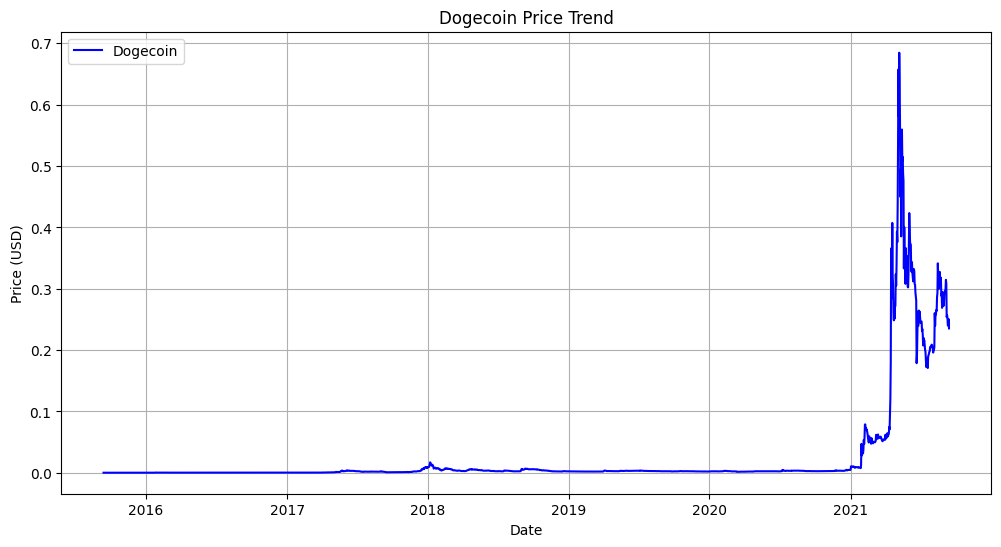

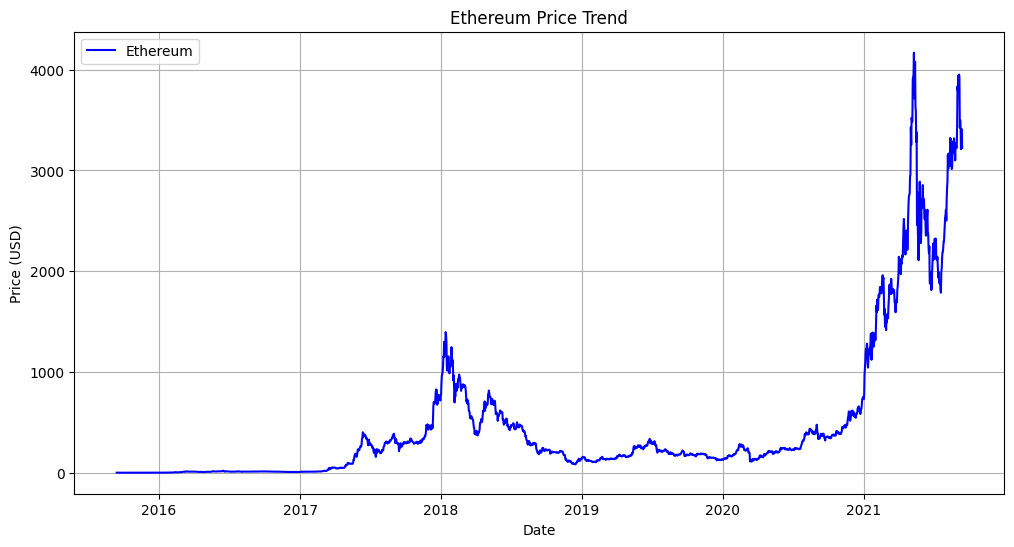

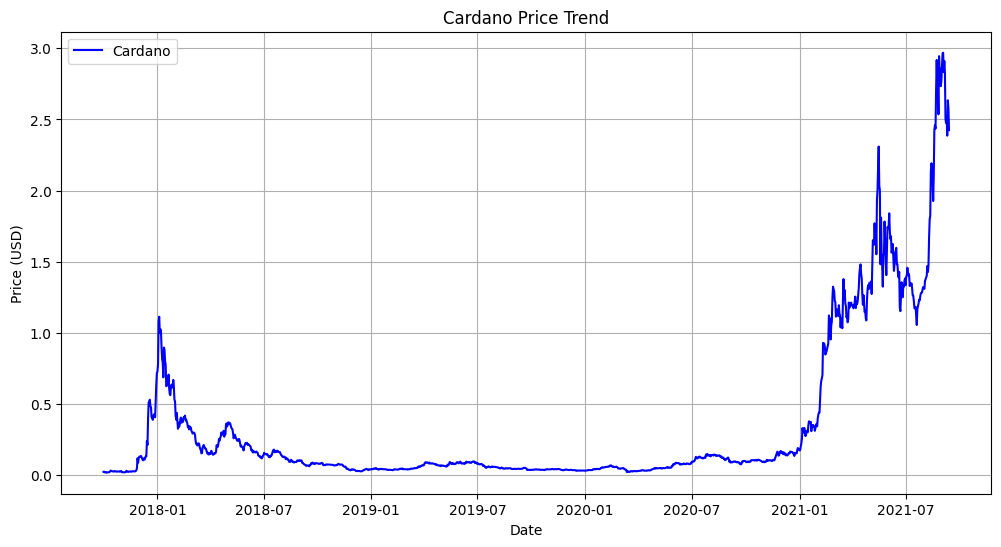

In [28]:
# Plot the data for each cryptocurrency (optional)
plot_data(bitcoindf, 'Bitcoin', 'close')
plot_data(dogecoindf, 'Dogecoin', 'close')
plot_data(ethereumdf, 'Ethereum', 'close')
plot_data(cardanodf, 'Cardano', 'close')